# Multiple Y-Axes on one Plot

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline 

import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.1
NumPy Version: 1.17.3+intel.0
Python Version: 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Ran on 2019-12-06T16:12:43.556623


The first example is mine. The second is taken *nearly* verbatim from <http://stackoverflow.com/a/7734614>

I will experiment a little with combining scientific notation as well as log scales but I won't go too crazy (until I have to do it at which point, I will update this)

## Double y-axis

**NOTE**: The keyword for `tick_params` is `colors` (with an **s**)

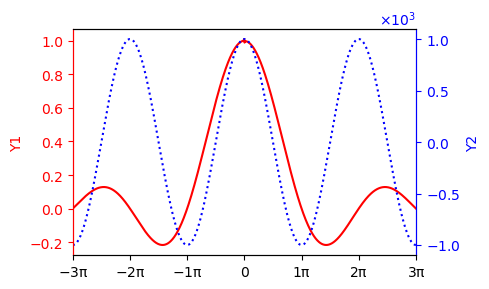

In [2]:
fig, ax1 = plt.subplots(1,1,figsize=(5,3),dpi=100)

X = np.linspace(-3*np.pi,3*np.pi,1000)
Y1 = np.sin(X)/(X+0.0001)
Y2 = 1e3 * np.cos(X)
Y3 =  np.exp(np.abs(X))

# Twin the axis
ax2 = ax1.twinx()

# Plotting
ax1.plot(X,Y1,'-r')
ax2.plot(X,Y2,':b')

# Color the axis and add labels
ax1.set_ylabel('Y1',color='r')
ax2.set_ylabel('Y2',color='b')

ax1.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')

# Set the spine colors. Really only need to do ax2 since that is on top
# but this just makes 100% sure
for ax in (ax1,ax2):
    ax.spines['left'].set_color('r')
    ax.spines['right'].set_color('b')

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_color('b') # Set the color of the power

# Better X-Ticks
ax1.set_xlim((X.min(),X.max()))
ax1.set_xticks(np.arange(-3,4)*np.pi)
xticklabs = [r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4)]; xticklabs[3]='0'
ax1.set_xticklabels(xticklabs) 

fig.tight_layout()

### Triple y-axis

Again, this is inspired by <http://stackoverflow.com/a/7734614> but I make a few changes

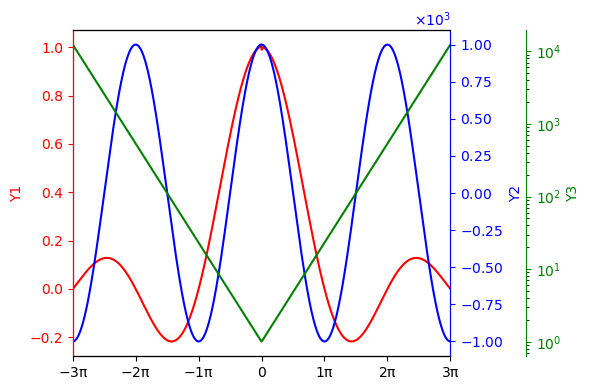

In [3]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4),dpi=100)

# Twin the x-axis twice to make independent y-axes.
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

# Plot
ax1.plot(X,Y1,'-r')
ax2.plot(X,Y2,'-b')
ax3.plot(X,Y3,'-g')

colors = ['r','b','g']
axes = [ax1,ax2,ax3]
names = ['Y1','Y2','Y3']

for ax in (ax1,ax2,ax3):
    ax.spines['left'].set_color(colors[0])
    ax.spines['right'].set_color(colors[1])
ax3.spines['right'].set_color('g') # reset
    
for ax,color,name in zip(axes,colors,names):
    ax.set_ylabel(name,color=color)
    ax.tick_params(axis='y', colors=color)

# Nicer ax2 y axis
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_color('b') # Set the color of the power

# Set ax3 to log
ax3.set_yscale('log')

# Better X-Ticks
ax1.set_xlim((X.min(),X.max()))
ax1.set_xticks(np.arange(-3,4)*np.pi)
xticklabs = [r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4)]; xticklabs[3]='0'
ax1.set_xticklabels(xticklabs)

fig.tight_layout()
